<a href="https://colab.research.google.com/github/farhanfaiyazkhan/Mall-Customers-using-K-Means/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
customers = pd.read_csv("Mall_Customers.csv")
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

In [ ]:
customers = customers.dropna(subset=features)
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data = customers[features].copy()
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data

,Age,Annual Income (k$),Spending Score (1-100)
0,1.192308,1.000000,4.877551
1,1.576923,1.000000,9.163265
2,1.384615,1.081967,1.510204
3,1.961538,1.081967,8.755102
4,3.500000,1.163934,4.979592
...,...,...,...
195,4.269231,9.606557,8.959184
196,6.192308,10.098361,3.755102
197,3.692308,10.098361,8.448980
198,3.692308,11.000000,2.734694


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,5.009615,4.734426,6.020408
std,2.686348,2.152846,2.635053
min,1.000000,1.000000,1.000000
25%,3.067308,3.172131,4.443878
50%,4.461538,4.811475,6.000000
75%,6.961538,6.163934,8.346939
max,11.000000,11.000000,11.000000


In [ ]:
def random_centroids(data, k):
  centroids = []
  for i in range(k) :
    centroid = data.apply(lambda x : float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 3)
centroids

,0,1,2
Age,4.269231,6.961538,6.192308
Annual Income (k$),2.065574,2.475410,8.213115
Spending Score (1-100),6.000000,1.306122,9.877551


In [ ]:
def get_labels(data, centroids) :
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)
labels

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Length: 200, dtype: int64

In [ ]:
labels.value_counts()

0    103
1     51
2     46
dtype: int64

In [ ]:
def new_centroids(data, labels) :
  new_centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x)).mean()).T
  return new_centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, centroids, labels, iteration) :
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c='r')
  plt.show()

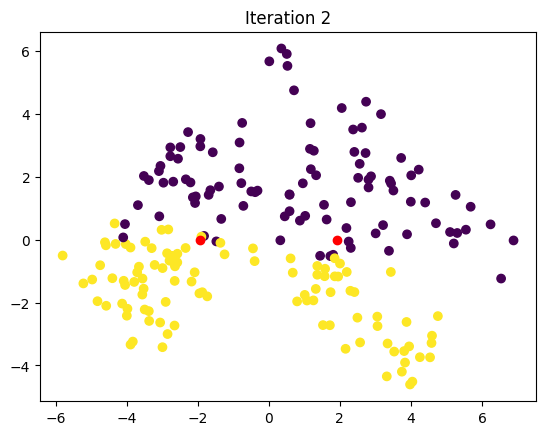

In [ ]:
max_iters = 3
k = 2


centroids = random_centroids(data, k)
old_centroid = pd.DataFrame()

iteration = 1
while iteration < max_iters and not old_centroid.equals(centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels)
  plot_clusters(data, centroids, labels, iteration)
  iteration += 1